# Data visualisation and preprocessing

In [ ]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv('weight-height.csv')
data.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [17]:
# let's round up the height and weight for our convenience
data['Height'] = data['Height'].apply(np.round)
data['Weight'] = data['Weight'].apply(np.round)
data.describe()

,Height,Weight
count,10000.000000,10000.00000
mean,66.367400,161.44120
std,3.852675,32.10714
min,54.000000,65.00000
25%,64.000000,136.00000
50%,66.000000,161.00000
75%,69.000000,187.00000
max,79.000000,270.00000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Seaborn is a library build on top of matplotlib, making it easier and quickier to build a graphs.For start, let's use it.

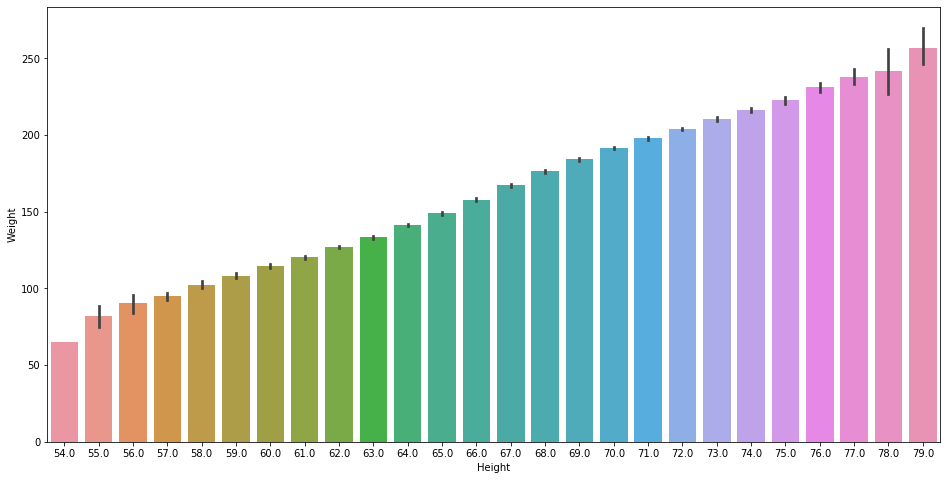

In [21]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='Height', y='Weight', data=data)

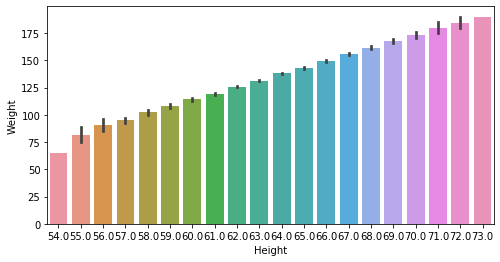

In [25]:
female_condition = data['Gender'] == 'Female'
female_data = data[female_condition]
female_data = female_data[['Height', 'Weight']]
fig = plt.figure(figsize=(8, 4))
sns.barplot(x='Height', y='Weight', data=female_data)

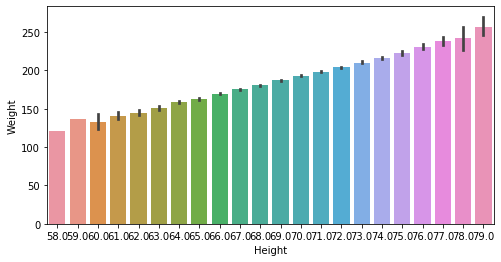

In [28]:
male_data = data[data.Gender == 'Male']
fig = plt.figure(figsize=(8, 4))
sns.barplot(x='Height', y='Weight', data=male_data)

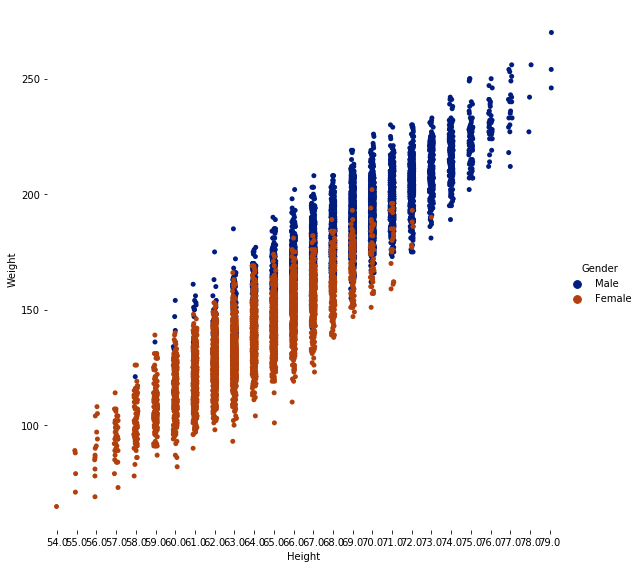

In [34]:
compared_graphs = sns.catplot(x='Height', y='Weight', hue='Gender', data=data, height=8, palette='dark')
compared_graphs.despine(left=True, bottom=True)

*Sklearn's* One Hot Encoder converts k categorical varibales into **kn** variables when *pandas* get_dummies converts it into **kn - k** variables.But in the first case we can get into "dummy variables trap"(when independent variables are highly correlated and one can be guessed from another) when intercepting, so we must be careful.

In case of genders, it's exactly this trap.The other category(if binorize one of the genders) is just redundunt and when intercepting it will give us the problem(when creating the new column, which is the summ of categorical).More info:
https://www.algosome.com/articles/dummy-variable-trap-regression.html

In [36]:
# from sklearn.preprocessing import OneHotEncoder
new_data = pd.get_dummies(data, drop_first=True) # We do not select columns, because we have only 1 categorical value to convert =>
# we can conver all the data.We must explicitly choose drop_first=True, otherwise it's doing One Hot Encoding
new_data.head()

,Height,Weight,Gender_Male
0,74.0,242.0,1
1,69.0,162.0,1
2,74.0,213.0,1
3,72.0,220.0,1
4,70.0,206.0,1


Because we have no minoroty classes at all(which would make sufficient difference to the model), so we can just use normal
train-test split instead of stratified.More info:
https://stats.stackexchange.com/questions/250273/benefits-of-stratified-vs-random-sampling-for-generating-training-data-in-classi

In [50]:
from sklearn.model_selection import train_test_split
# We need to predict weight base on 2 simple infos: gender and height.So y_test = data['weight']
X = new_data.loc[:, ['Height', 'Gender_Male']]
y = new_data.loc[:, 'Weight']
# X.head()
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [54]:
y_prediction = reg.predict(x_test)

In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)

In [57]:
rmse  # aka ~ 10,26 pounds or ~4,7 kgs

10.262524447830227